## Problem 4

**First graph**

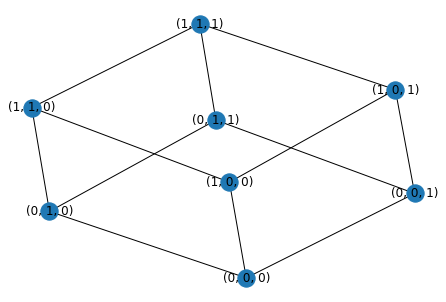

In [53]:
G = nx.generators.lattice.hypercube_graph(3)
n_nodes = len(G)
nx.draw(G, with_labels=True)

In [24]:
# Construct a dictionary that maps the label of nodes (from (0,0,0) to (1,1,1)) to their index (from 0 to n_nodes-1 = 7)
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i

# Number of iterations
n_iter = 100;

# We will store final opinion vectors and 
# average of final opinions in dictionaries
# where the key is the position (i,j) of the 
# 1-stubborn agent
final_opinions = dict()
average_opinion = dict() 


for (i,j,k) in G.nodes:
    # Position (0,0,0) is occupied by the 0-stubborn node
    if (i,j,k)==(0,0,0):
        continue
        
    # Stubborn and regular nodes
    stubborn = [(0,0,0), (i,j,k)];
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
    W = W.toarray() # convert W to a numpy array
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W

    # Submatrices
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[(i,j,k)] = x[:,n_iter-1]
    average_opinion[(i,j,k)] = np.average(final_opinions[(i,j,k)])
    print("Average opinion:", average_opinion[(i,j,k)])

Stubborn nodes: [(0, 0, 0), (0, 0, 1)]
Average opinion: 0.4999999999850473
Stubborn nodes: [(0, 0, 0), (0, 1, 0)]
Average opinion: 0.4999999999628718
Stubborn nodes: [(0, 0, 0), (0, 1, 1)]
Average opinion: 0.49999999999997796
Stubborn nodes: [(0, 0, 0), (1, 0, 0)]
Average opinion: 0.5000000000117133
Stubborn nodes: [(0, 0, 0), (1, 0, 1)]
Average opinion: 0.5000000000000009
Stubborn nodes: [(0, 0, 0), (1, 1, 0)]
Average opinion: 0.49999999999998923
Stubborn nodes: [(0, 0, 0), (1, 1, 1)]
Average opinion: 0.4999999999999999


So it doesn't matter where we position the second stubborn node $s$ with $x_{s}=1$: the average asymptotic opinion $H(s)$ will be equal to $0.5$

**Second graph**

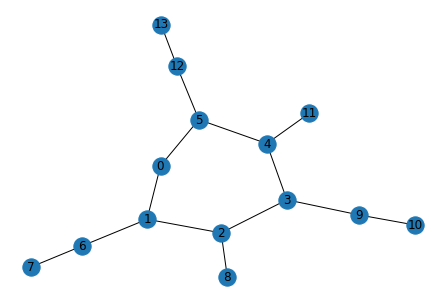

In [33]:
G = nx.generators.classic.cycle_graph(6)
G.add_nodes_from(range(6,14))
G.add_edges_from([(1,6),(6,7),(2,8),(3,9),(9,10),(4,11),(5,12),(12,13)])
n_nodes = len(G)
nx.draw(G, with_labels=True)

In [35]:
# Number of iterations
n_iter = 1000;

# We will store final opinion vectors and average of final opinions
# in dictionaries where the key is the 1-stubborn node
final_opinions = dict()
average_opinion = dict() 


for i in G.nodes:
    # Node 0 is the 0-stubborn node
    if i==0:
        continue
        
    # Stubborn and regular nodes
    stubborn = [0, i];
    regular = [node for node in G.nodes if node not in stubborn]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
    W = W.toarray() # convert W to a numpy array
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W

    # Submatrices
    Q = P[np.ix_(regular, regular)]
    E = P[np.ix_(regular, stubborn)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn,0] = u;
    x[regular,0] = ic;

    for t in range(1,n_iter):
        x[regular, t] = Q @ x[regular, t-1] + E @ x[stubborn, t-1]
        x[stubborn, t] = x[stubborn, t-1];

    final_opinions[i] = x[:,n_iter-1]
    average_opinion[i] = np.average(final_opinions[i])
    print("Average opinion:", average_opinion[i])

Stubborn nodes: [0, 1]
Average opinion: 0.557142857142857
Stubborn nodes: [0, 2]
Average opinion: 0.5357142857142857
Stubborn nodes: [0, 3]
Average opinion: 0.5476190476190477
Stubborn nodes: [0, 4]
Average opinion: 0.5357142857142856
Stubborn nodes: [0, 5]
Average opinion: 0.5571428571428572
Stubborn nodes: [0, 6]
Average opinion: 0.3311688311688311
Stubborn nodes: [0, 7]
Average opinion: 0.2394957983193278
Stubborn nodes: [0, 8]
Average opinion: 0.3367346938775511
Stubborn nodes: [0, 9]
Average opinion: 0.38571428571428573
Stubborn nodes: [0, 10]
Average opinion: 0.2959183673469388
Stubborn nodes: [0, 11]
Average opinion: 0.336734693877551
Stubborn nodes: [0, 12]
Average opinion: 0.33116883116883117
Stubborn nodes: [0, 13]
Average opinion: 0.23949579831932777


Therefore, the second stubborn node $s$ with $x_{s}=1$ which would maximize the average asymptotic opinion $H(s)$ is equivalently node 1 or node 5, i.e. the nodes adjacent to the stubborn node $0$ with opinion $x_{0}=0$;

if one of these two nodes were stubborn with opinion $1$, then $H(s)\simeq 0.55714$